In [1]:
import pandas as pd

In [7]:
data1 = pd.read_csv('../csvki/VLagun_Crus_Basins.csv')
data1.dropna(inplace=True)

X = pd.get_dummies(data1)
X.drop(['Basin'], inplace=True, axis=1)
y = data1['Basin']

data1.head()

,Bosmina longirostris,Ceriodaphnia sp.,Diaphanosoma brachyurum,Leptodora kindtii,Acartia longiremis,Acartia tonsa,Eurytemora affinis,Cyclops sp.,Nauplii Cyclopoida,Nauplii Calanoida,Thermocyclops oithonoides,Eurytemora lacustris,Basin
0,0.0,0.0,0.0,0.0,2.0710,0.9298,0.9251,0.0000,0.0025,0.0257,0.0000,0.0,0
1,0.0,0.0,0.0,0.0,0.5014,0.0378,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0
2,0.0,0.0,0.0,0.0,0.0931,0.0000,0.0000,0.0093,0.0138,0.0006,0.0091,0.0,0
3,0.0,0.0,0.0,0.0,0.0000,0.0000,0.0129,0.0060,0.0140,0.0155,0.0179,0.0,0
4,0.0,0.0,0.0,0.0,0.0000,0.0000,0.0141,0.0000,0.0093,0.0007,0.0166,0.0,0


In [8]:
from sklearn.model_selection import train_test_split
X = X.iloc[:,0:12]
y = y.iloc[:,]
test_size = 0.25

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state = 16)
print("Shape of X_Train:", X_train.shape)
print("Shape of X_test:", X_test.shape)

Shape of X_Train: (116, 12)
Shape of X_test: (39, 12)


In [9]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(random_state=16)
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

In [10]:
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[23,  0],
       [10,  6]], dtype=int64)

Text(0.5, 427.9555555555555, 'Predicted label')

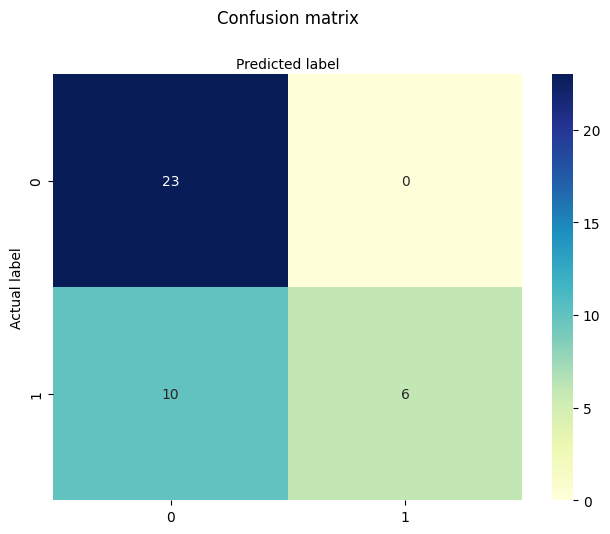

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

class_names = [0, 1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
#Text(0.5, 257.44, 'Predicted label');

In [14]:
from sklearn.metrics import classification_report
target_names = ['without diabetes', 'with diabetes']
print(classification_report(y_test, y_pred, target_names=target_names))

                  precision    recall  f1-score   support

without diabetes       0.70      1.00      0.82        23
   with diabetes       1.00      0.38      0.55        16

        accuracy                           0.74        39
       macro avg       0.85      0.69      0.68        39
    weighted avg       0.82      0.74      0.71        39



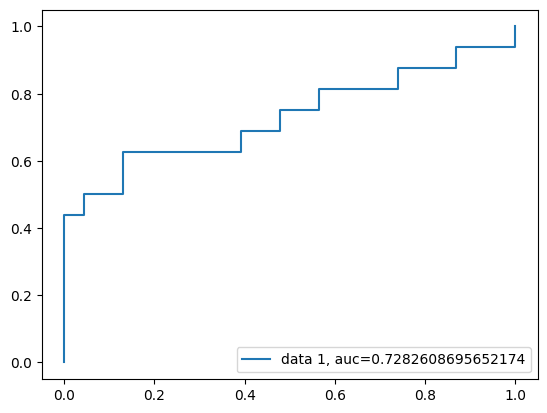

In [17]:
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr, tpr, label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [18]:
data1 = pd.read_csv('../csvki/VLagun_Rotif_Basins.csv')
data1.dropna(inplace=True)

X = pd.get_dummies(data1)
X.drop(['Basin'], inplace=True, axis=1)
y = data1['Basin']

data1.head()

,Anureopsis fissa,Ascomorpha saltans,Asplanchna priodonta,Brachionus angularis,Brachionus calyciflorus calyciflorus,Brachionus calyciflorus f.amphiceros,Brachionus calyciflorus spinosus,Brachionus urceolaris,Brachionus calyciflorus f.anureiformis,Filinia longiseta,Keratella cochlearis cochlearis,Keratella cochlearis f.tecta,Keratella quadrata,Polyarthra vulgaris,Polyarthra platyptera,Pompholyx sp.,Synchaeta sp.,Trichocerca pusilla,Trichocerca similis,Basin
0,0.0000,0.0068,0.0000,0.0000,0.0000,0.0,0.0,0.0,0.0,1.3152,0.8920,0.2714,0.0000,0.0313,0.0,0.0000,0.0000,0.0045,0.0009,0
1,0.0003,0.0000,0.0556,0.0000,0.0179,0.0,0.0,0.0,0.0,0.0769,0.0640,0.0464,0.0000,0.0111,0.0,0.0000,0.0437,0.0041,0.0020,0
2,0.0001,0.0000,0.0014,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0466,0.0120,0.0044,0.0000,0.0000,0.0,0.0001,0.0000,0.0000,0.0000,0
3,0.0001,0.0000,0.0000,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0313,0.0079,0.0040,0.0000,0.0000,0.0,0.0000,0.0000,0.0000,0.0000,0
4,0.0001,0.0000,0.0000,0.0003,0.0000,0.0,0.0,0.0,0.0,0.0491,0.0143,0.0019,0.0026,0.0000,0.0,0.0001,0.0000,0.0000,0.0000,0


In [27]:
X = X.iloc[:,0:19]
y = y.iloc[:,]
test_size = 0.25

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state = 16)
print("Shape of X_Train:", X_train.shape)
print("Shape of X_test:", X_test.shape)

Shape of X_Train: (116, 12)
Shape of X_test: (39, 12)


In [28]:

logreg = LogisticRegression(random_state=16)
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

In [29]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[20,  3],
       [15,  1]], dtype=int64)

Text(0.5, 427.9555555555555, 'Predicted label')

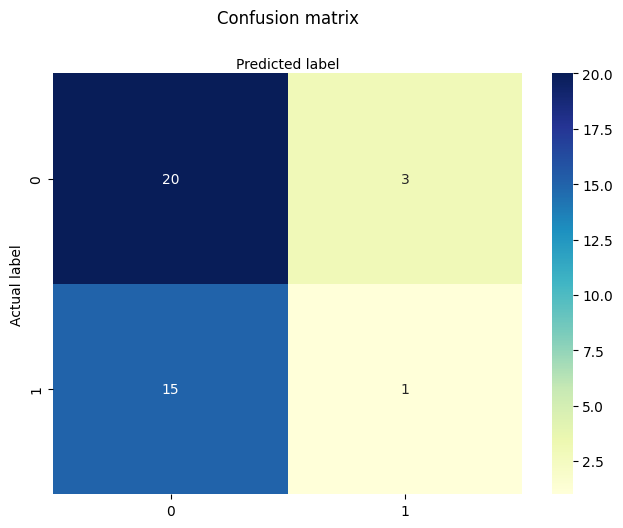

In [30]:
class_names = [0, 1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
#Text(0.5, 257.44, 'Predicted label');

In [31]:
target_names = ['without diabetes', 'with diabetes']
print(classification_report(y_test, y_pred, target_names=target_names))

                  precision    recall  f1-score   support

without diabetes       0.57      0.87      0.69        23
   with diabetes       0.25      0.06      0.10        16

        accuracy                           0.54        39
       macro avg       0.41      0.47      0.39        39
    weighted avg       0.44      0.54      0.45        39



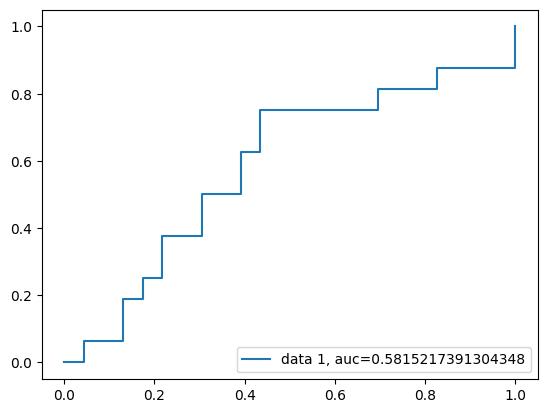

In [32]:
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr, tpr, label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()